<a href="https://colab.research.google.com/github/SWASTIK-CHAMOLA/College-AI-ML-LAB/blob/main/LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lab 10: Write a Python program to demonstrate Clustering, Regression and Classification tasks.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Shape: (7691, 13)

--- Clustering using K-Means ---


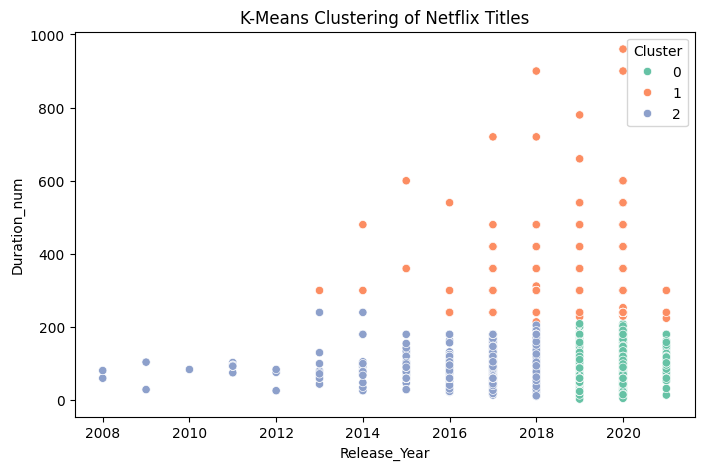

Cluster Centers (Standardized):
 [[ 0.73104506 -0.0824844 ]
 [ 0.27636221  4.29156227]
 [-0.91514121 -0.16450173]]

--- Regression using Linear Regression ---
R² Score: 0.009024323544656099
Mean Squared Error: 3163.9907610729333


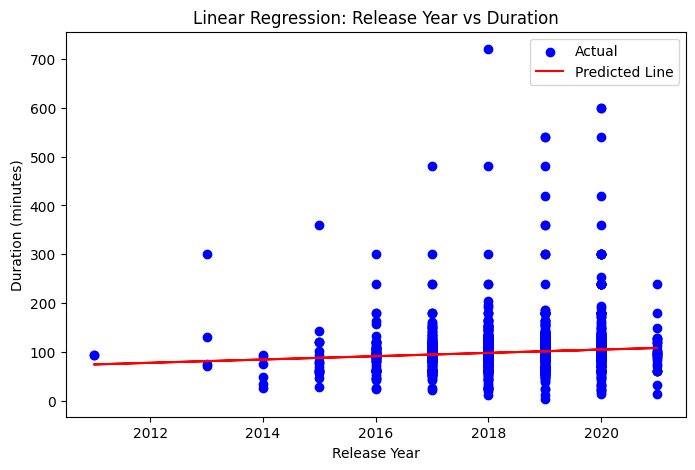


--- Classification using Logistic Regression ---
Accuracy: 0.7037037037037037

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       456
           1       0.70      1.00      0.83      1083

    accuracy                           0.70      1539
   macro avg       0.35      0.50      0.41      1539
weighted avg       0.50      0.70      0.58      1539



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


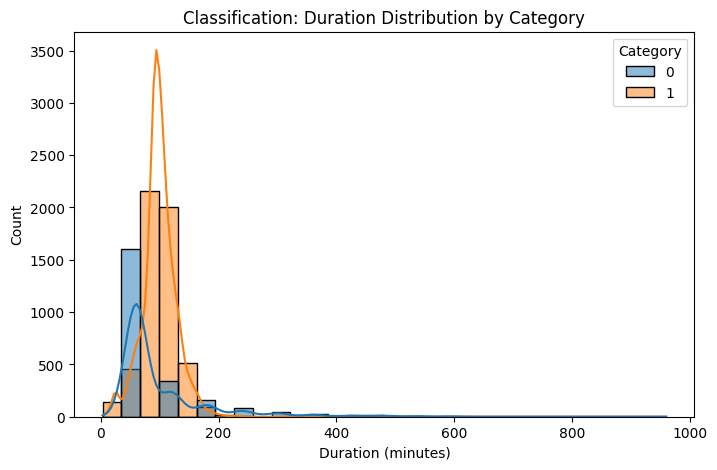


--- Summary of Insights ---
1️⃣ Clustering grouped content based on release year and duration.
2️⃣ Regression showed weak correlation between release year and duration.
3️⃣ Classification distinguished between Movies and TV Shows using duration.
✅ Demonstrated all three core ML tasks effectively.


In [3]:
# Lab 10: Demonstrate Clustering, Regression, and Classification Tasks

# -------------------------------
# Step 1: Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# -------------------------------
# Step 2: Load and Prepare Dataset
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/Netflix Dataset.csv"
df = pd.read_csv(file_path)

# Basic preprocessing
df['Category'] = df['Category'].map({'Movie': 1, 'TV Show': 0})
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Convert Duration to numeric
def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split()[0]) * 60  # approximate
    else:
        return np.nan

df['Duration_num'] = df['Duration'].apply(convert_duration)
df = df.dropna(subset=['Duration_num', 'Release_Year'])

print("Dataset Shape:", df.shape)

# -------------------------------
# Step 3: Clustering (K-Means)
# -------------------------------
print("\n--- Clustering using K-Means ---")

# Select numerical features
X_cluster = df[['Release_Year', 'Duration_num']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Release_Year', y='Duration_num', hue='Cluster', data=df, palette='Set2')
plt.title("K-Means Clustering of Netflix Titles")
plt.show()

print("Cluster Centers (Standardized):\n", kmeans.cluster_centers_)

# -------------------------------
# Step 4: Regression (Linear Regression)
# -------------------------------
print("\n--- Regression using Linear Regression ---")

# Predict duration based on release year
X_reg = df[['Release_Year']]
y_reg = df['Duration_num']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualize regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title("Linear Regression: Release Year vs Duration")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.legend()
plt.show()

# -------------------------------
# Step 5: Classification (Logistic Regression)
# -------------------------------
print("\n--- Classification using Logistic Regression ---")

# Predict Category (Movie or TV Show) using duration
X_class = df[['Duration_num']]
y_class = df['Category']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_c, y_train_c)
y_pred_c = log_reg.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# Visualize classification boundary
plt.figure(figsize=(8,5))
sns.histplot(x='Duration_num', hue='Category', data=df, bins=30, kde=True)
plt.title("Classification: Duration Distribution by Category")
plt.xlabel("Duration (minutes)")
plt.show()

# -------------------------------
# Step 6: Insights
# -------------------------------
print("\n--- Summary of Insights ---")
print("1️⃣ Clustering grouped content based on release year and duration.")
print("2️⃣ Regression showed weak correlation between release year and duration.")
print("3️⃣ Classification distinguished between Movies and TV Shows using duration.")
print("✅ Demonstrated all three core ML tasks effectively.")
